In [7]:
from matplotlib import pyplot as plt
import numpy as np
import os.path
shape_size = 48
freq = np.genfromtxt('data/freq.txt')
def spec(batch, ran):
    path = 'data/DATA'+str(batch)+'/DATA'+str(batch)+'_sp'
    miss = []
    for i in ran:
        if not os.path.exists(path+str(i)+'.txt'):
            miss.append(i)
    return miss

import meep as mp
import math
import cmath

shape_size = 48
sx, sy, sz = 1, 1, 4
h = 1.25
dpml = 0.5
b_m, c_m = 1.4, 3.54
res = 27
echo = 1000
cell_size = mp.Vector3(sx,sy,sz)
fcen = 0.5
df = 0.2
theta = math.radians(0)
nfreq = 200

# k with correct length (plane of incidence: XZ) 
k = mp.Vector3(math.sin(theta),0,math.cos(theta)).scale(fcen)
def pw_amp(k, x0):
    def _pw_amp(x):
        return cmath.exp(1j * 2 * math.pi * k.dot(x + x0))
    return _pw_amp

def get_spec(batch, index):
    b = np.genfromtxt('data/DATA'+str(batch) +'_sh.txt')
    start = index * shape_size
    xc = b[start:start + shape_size, 0]
    yc = b[start:start + shape_size, 1]
    vertices = [mp.Vector3(xc[0],yc[0])]

    for j in range(1, len(xc) - 1):
        # eliminate duplicate point
        if xc[j] == xc[j - 1] and yc[j] == yc[j - 1]:
            continue
        vertices.append(mp.Vector3(xc[j], yc[j]))
        #print(xc[i][j], yc[i][j])
    # calculate transmission
    bend = get_bend(vertices)
    Ts = []
    st = np.genfromtxt('data/straight.txt')
    for j in range(nfreq):
        Ts = np.append(Ts, bend[j]/st[j])
    return Ts
#     plt.axis('equal')
#     plt.ylim(-0.5, 0.5)
#     plt.xlim(-0.5, 0.5)
#     plt.plot(x, y)
#     plt.fill(x, y)
#     plt.show()
def get_bend(vertices):
    geometry = [mp.Block(size = cell_size, material=mp.Medium(index=b_m)),
                mp.Prism(vertices, 
                         height=h, 
                         material=mp.Medium(index=c_m),
                         center=mp.Vector3()
                        )]
    pml_layers = [mp.PML(thickness=1, direction = mp.Z, side=mp.High),
                  mp.Absorber(thickness=1,direction = mp.Z, side=mp.Low)]
    src_pos = -(sz/2 - dpml - 0.5)
    src = [mp.Source(src = mp.GaussianSource(fcen, fwidth=df),
                     component = mp.Ey,
                     center = mp.Vector3(0,0,src_pos),
                     size = mp.Vector3(sx,sy,0),
                     amp_func=pw_amp(k,mp.Vector3(0,0,src_pos)))]
    sim = mp.Simulation(resolution=res,
                        cell_size=cell_size,
                        boundary_layers=pml_layers,
                        sources=src,
                        geometry=geometry,
                        k_point=k)
    freg = mp.FluxRegion(center=mp.Vector3(0,0,-src_pos),
                         size = mp.Vector3(sx,sy,0))
    trans = sim.add_flux(fcen, df, nfreq, freg)
    sim.run(until = echo)
    bend = mp.get_fluxes(trans)
    return bend

Batch: 46 sample: 80
-----------
Initializing structure...
Meep: using complex fields.
Meep progress: 2.611111111111111/1000.0 = 0.3% done in 4.0s, 1535.5s to go
Meep progress: 5.777777777777778/1000.0 = 0.6% done in 8.0s, 1381.0s to go
Meep progress: 9.055555555555555/1000.0 = 0.9% done in 12.0s, 1316.9s to go
Meep progress: 12.259259259259258/1000.0 = 1.2% done in 16.1s, 1293.5s to go
Meep progress: 15.092592592592592/1000.0 = 1.5% done in 20.1s, 1308.9s to go
Meep progress: 17.796296296296294/1000.0 = 1.8% done in 24.1s, 1327.8s to go
Meep progress: 20.85185185185185/1000.0 = 2.1% done in 28.1s, 1318.3s to go
Meep progress: 23.48148148148148/1000.0 = 2.3% done in 32.1s, 1334.6s to go
Meep progress: 26.203703703703702/1000.0 = 2.6% done in 36.1s, 1341.5s to go
Meep progress: 28.98148148148148/1000.0 = 2.9% done in 40.1s, 1343.5s to go
Meep progress: 31.72222222222222/1000.0 = 3.2% done in 44.1s, 1346.1s to go
Meep progress: 34.51851851851852/1000.0 = 3.5% done in 48.1s, 1346.2s to go

Meep progress: 309.46296296296293/1000.0 = 30.9% done in 425.4s, 949.3s to go
Meep progress: 312.3333333333333/1000.0 = 31.2% done in 429.4s, 945.5s to go
Meep progress: 315.14814814814815/1000.0 = 31.5% done in 433.4s, 941.9s to go
Meep progress: 318.0/1000.0 = 31.8% done in 437.5s, 938.2s to go
Meep progress: 320.85185185185185/1000.0 = 32.1% done in 441.5s, 934.4s to go
Meep progress: 323.72222222222223/1000.0 = 32.4% done in 445.5s, 930.6s to go
Meep progress: 326.6111111111111/1000.0 = 32.7% done in 449.5s, 926.7s to go
Meep progress: 329.5185185185185/1000.0 = 33.0% done in 453.5s, 922.7s to go
Meep progress: 332.3333333333333/1000.0 = 33.2% done in 457.5s, 919.1s to go
Meep progress: 335.2962962962963/1000.0 = 33.5% done in 461.5s, 914.9s to go
Meep progress: 338.18518518518516/1000.0 = 33.8% done in 465.5s, 911.0s to go
Meep progress: 341.0185185185185/1000.0 = 34.1% done in 469.6s, 907.4s to go
Meep progress: 343.8703703703703/1000.0 = 34.4% done in 473.6s, 903.6s to go
Meep p

Meep progress: 633.3148148148148/1000.0 = 63.3% done in 854.7s, 494.9s to go
Meep progress: 636.1666666666666/1000.0 = 63.6% done in 858.8s, 491.1s to go
Meep progress: 639.074074074074/1000.0 = 63.9% done in 862.8s, 487.3s to go
Meep progress: 642.0185185185185/1000.0 = 64.2% done in 866.8s, 483.3s to go
Meep progress: 644.8888888888888/1000.0 = 64.5% done in 870.8s, 479.5s to go
Meep progress: 647.8148148148148/1000.0 = 64.8% done in 874.8s, 475.6s to go
Meep progress: 650.6851851851851/1000.0 = 65.1% done in 878.8s, 471.8s to go
Meep progress: 653.6111111111111/1000.0 = 65.4% done in 882.8s, 467.9s to go
Meep progress: 656.6481481481482/1000.0 = 65.7% done in 886.8s, 463.7s to go
Meep progress: 659.6481481481482/1000.0 = 66.0% done in 890.8s, 459.6s to go
Meep progress: 662.6111111111111/1000.0 = 66.3% done in 894.9s, 455.6s to go
Meep progress: 665.7777777777777/1000.0 = 66.6% done in 898.9s, 451.2s to go
Meep progress: 669.0925925925926/1000.0 = 66.9% done in 902.9s, 446.5s to go


Meep progress: 961.3703703703703/1000.0 = 96.1% done in 1280.0s, 51.4s to go
Meep progress: 964.3148148148148/1000.0 = 96.4% done in 1284.0s, 47.5s to go
Meep progress: 967.2592592592592/1000.0 = 96.7% done in 1288.0s, 43.6s to go
Meep progress: 970.148148148148/1000.0 = 97.0% done in 1292.0s, 39.8s to go
Meep progress: 973.0/1000.0 = 97.3% done in 1296.0s, 36.0s to go
Meep progress: 975.9444444444443/1000.0 = 97.6% done in 1300.0s, 32.0s to go
Meep progress: 978.8518518518518/1000.0 = 97.9% done in 1304.1s, 28.2s to go
Meep progress: 981.6666666666666/1000.0 = 98.2% done in 1308.1s, 24.4s to go
Meep progress: 984.537037037037/1000.0 = 98.5% done in 1312.1s, 20.6s to go
Meep progress: 987.4259259259259/1000.0 = 98.7% done in 1316.1s, 16.8s to go
Meep progress: 990.3148148148148/1000.0 = 99.0% done in 1320.1s, 12.9s to go
Meep progress: 993.2407407407406/1000.0 = 99.3% done in 1324.1s, 9.0s to go
Meep progress: 996.1851851851851/1000.0 = 99.6% done in 1328.1s, 5.1s to go
Meep progress: 

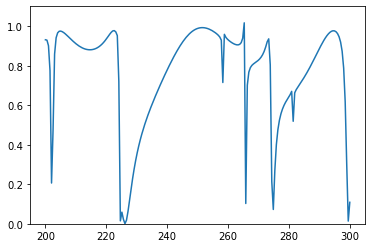

In [8]:
batch = 46
ran = [i for i in range(81)]
miss = spec(batch, ran)
freq = np.genfromtxt('data/freq.txt')
for i in ran:
    
    path = 'data/DATA'+str(batch)+'/DATA'+str(batch)+'_sp'
    if i in miss:
        print('Batch: '+str(batch)+ ' sample: '+str(i))
        Ts = get_spec(batch,i)
        np.savetxt(path +str(i)+'.txt', Ts)
        Ts = np.genfromtxt(path +str(i)+'.txt')
        plt.ylim(0, 1.1)
        plt.plot(freq, Ts)
        plt.show()